In [159]:
import pandas as pd
import numpy as np
import datetime
from cleaning_helpers import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/NYPD.csv')
df.head()

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,17,18,20,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,36653723,2017-07-09 23:26:34,07/10/2017 01:55:52 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11203.0,195 EAST 40 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.650871,-73.939972,"(40.65087119116162, -73.93997156019773)"
1,36653724,2017-07-09 23:11:08,07/10/2017 07:36:59 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10469.0,1135 PELHAM PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.858298,-73.854455,"(40.85829772629949, -73.85445497857519)"
2,36653725,2017-07-09 23:15:39,07/10/2017 03:14:15 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10458.0,2378 BATHGATE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.856369,-73.890276,"(40.856369402043434, -73.89027597242314)"
3,36653726,2017-07-09 20:12:26,07/09/2017 08:33:15 PM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10031.0,618 WEST 136 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821047,-73.955260,"(40.82104731868181, -73.95526006866052)"
4,36653727,2017-07-09 13:31:16,07/09/2017 05:44:29 PM,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11377.0,47-56 45 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740248,-73.920242,"(40.74024808519835, -73.92024203568081)"


In [5]:
df.shape

(5451739, 41)

In [5]:
empty_cols = mostly_nan(df)
empty_cols

['intersection_street_1',
 'intersection_street_2',
 'landmark',
 'vehicle_type',
 'taxi_company_borough',
 'taxi_pick_up_location',
 'bridge_highway_name',
 'bridge_highway_direction',
 'road_ramp',
 'bridge_highway_segment']

In [39]:
df2 = drop_empty_cols(df)
df2.shape

(5451739, 31)

In [53]:
def check_na(df):
    for col in df.columns: 
        print(col, ': \n', df[col].isna().value_counts(normalize=True))
        print('-----'*5, '\n')

In [54]:
check_na(df2)

unique_key : 
 False    1.0
Name: unique_key, dtype: float64
------------------------- 

created_date : 
 False    1.0
Name: created_date, dtype: float64
------------------------- 

closed_date : 
 False    0.997843
True     0.002157
Name: closed_date, dtype: float64
------------------------- 

agency : 
 False    1.0
Name: agency, dtype: float64
------------------------- 

agency_name : 
 False    1.0
Name: agency_name, dtype: float64
------------------------- 

complaint_type : 
 False    1.0
Name: complaint_type, dtype: float64
------------------------- 

descriptor : 
 False    0.989394
True     0.010606
Name: descriptor, dtype: float64
------------------------- 

location_type : 
 False    0.981149
True     0.018851
Name: location_type, dtype: float64
------------------------- 

incident_zip : 
 False    0.997389
True     0.002611
Name: incident_zip, dtype: float64
------------------------- 

incident_address : 
 False    0.899521
True     0.100479
Name: incident_address, dtype: f

Priority for dropping: 
- No lat-long
- closed date
- incident zip 
- facility_type
- city
- address type
- cross_street 1 and 2

Drop from all:
- bbl
- maybe x/y_coord
- facility_type

Consider further:
- resolution_description
- resolution_action
- due_date


In [75]:
df2.dropna(subset=['closed_date', 'location', 'incident_zip', 'cross_street_1'], inplace=True)

In [76]:
df2.shape

(4802822, 31)

In [77]:
check_na(df2)

unique_key : 
 False    1.0
Name: unique_key, dtype: float64
------------------------- 

created_date : 
 False    1.0
Name: created_date, dtype: float64
------------------------- 

closed_date : 
 False    1.0
Name: closed_date, dtype: float64
------------------------- 

agency : 
 False    1.0
Name: agency, dtype: float64
------------------------- 

agency_name : 
 False    1.0
Name: agency_name, dtype: float64
------------------------- 

complaint_type : 
 False    1.0
Name: complaint_type, dtype: float64
------------------------- 

descriptor : 
 False    0.991415
True     0.008585
Name: descriptor, dtype: float64
------------------------- 

location_type : 
 False    0.979192
True     0.020808
Name: location_type, dtype: float64
------------------------- 

incident_zip : 
 False    1.0
Name: incident_zip, dtype: float64
------------------------- 

incident_address : 
 False    0.999337
True     0.000663
Name: incident_address, dtype: float64
------------------------- 

street_name

In [84]:
df2.facility_type.value_counts(dropna=False)

Precinct    4136167
NaN          666655
Name: facility_type, dtype: int64

In [85]:
df2.closed_date = pd.to_datetime(df.closed_date, format='%m/%d/%Y %I:%M:%S %p')
df2.created_date = pd.to_datetime(df2.created_date)
df2.head(2)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location
0,36653723,2017-07-09 23:26:34,2017-07-10 01:55:52,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11203.0,195 EAST 40 STREET,...,3.048940e+09,BROOKLYN,1000907.0,176412.0,MOBILE,Unspecified,BROOKLYN,40.650871,-73.939972,"(40.65087119116162, -73.93997156019773)"
1,36653724,2017-07-09 23:11:08,2017-07-10 07:36:59,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10469.0,1135 PELHAM PARKWAY,...,2.043650e+09,BRONX,1024511.0,252012.0,PHONE,Unspecified,BRONX,40.858298,-73.854455,"(40.85829772629949, -73.85445497857519)"


In [162]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4718785 entries, 0 to 5451737
Data columns (total 33 columns):
unique_key                        int64
created_date                      datetime64[ns]
closed_date                       datetime64[ns]
agency                            object
agency_name                       object
complaint_type                    object
descriptor                        object
location_type                     object
incident_zip                      float64
incident_address                  object
street_name                       object
cross_street_1                    object
cross_street_2                    object
address_type                      object
city                              object
facility_type                     object
status                            object
due_date                          object
resolution_description            object
resolution_action_updated_date    object
community_board                   object
bbl       

In [166]:
for col in df2.columns:
    print(col, ':', df2[col].nunique(), '\n')

unique_key : 4718785 

created_date : 4660119 

closed_date : 3799870 

agency : 1 

agency_name : 3 

complaint_type : 30 

descriptor : 52 

location_type : 25 

incident_zip : 239 

incident_address : 688856 

street_name : 10928 

cross_street_1 : 9947 

cross_street_2 : 10103 

address_type : 3 

city : 48 

facility_type : 1 

status : 2 

due_date : 4080809 

resolution_description : 22 

resolution_action_updated_date : 3903805 

community_board : 72 

bbl : 478855 

borough : 6 

x_coordinate_(state_plane) : 117107 

y_coordinate_(state_plane) : 128644 

open_data_channel_type : 5 

park_facility_name : 269 

park_borough : 6 

latitude : 707203 

longitude : 707209 

location : 707216 

complaint_duration : 83977 

duration_log : 83977 



In [127]:
df2['complaint_duration'] = df2.closed_date - df2.created_date
df2['complaint_duration'] = df['complaint_duration']/np.timedelta64(1,'h')

In [128]:
df2.complaint_duration.describe()

count    4.802822e+06
mean     4.165419e+00
std      1.106649e+03
min     -9.911010e+05
25%      1.186667e+00
50%      2.561389e+00
75%      5.086111e+00
max      1.495238e+04
Name: complaint_duration, dtype: float64

In [106]:
df2.complaint_duration.isna().any()

False

In [134]:
df2 = df2[df2['complaint_duration'] > 0]

In [153]:
df2.complaint_duration.describe()

count    4.793468e+06
mean     4.377398e+00
std      7.625544e+00
min      2.777778e-03
25%      1.184444e+00
50%      2.554722e+00
75%      5.064167e+00
max      1.689811e+02
Name: complaint_duration, dtype: float64

In [156]:
df2 = df2[df2['complaint_duration'] <= 24]

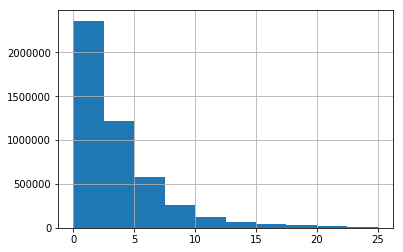

In [155]:
df2.complaint_duration.hist()

/Users/rab/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


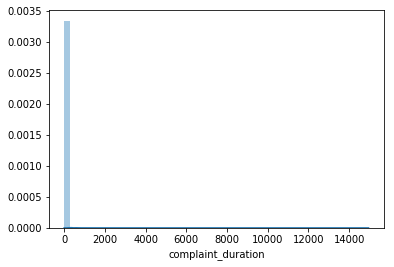

In [145]:
sns.distplot(df2.complaint_duration)

In [157]:
df2['duration_log'] = np.log(df2.complaint_duration)
df2.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,complaint_duration,duration_log
0,36653723,2017-07-09 23:26:34,2017-07-10 01:55:52,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11203.0,195 EAST 40 STREET,...,1000907.0,176412.0,MOBILE,Unspecified,BROOKLYN,40.650871,-73.939972,"(40.65087119116162, -73.93997156019773)",2.488333,0.911613
1,36653724,2017-07-09 23:11:08,2017-07-10 07:36:59,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10469.0,1135 PELHAM PARKWAY,...,1024511.0,252012.0,PHONE,Unspecified,BRONX,40.858298,-73.854455,"(40.85829772629949, -73.85445497857519)",8.430833,2.131896
2,36653725,2017-07-09 23:15:39,2017-07-10 03:14:15,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10458.0,2378 BATHGATE AVENUE,...,1014603.0,251295.0,PHONE,Unspecified,BRONX,40.856369,-73.890276,"(40.856369402043434, -73.89027597242314)",3.976667,1.380444
3,36653726,2017-07-09 20:12:26,2017-07-09 20:33:15,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,10031.0,618 WEST 136 STREET,...,996633.0,238410.0,ONLINE,Unspecified,MANHATTAN,40.821047,-73.955260,"(40.82104731868181, -73.95526006866052)",0.346944,-1.058591
4,36653727,2017-07-09 13:31:16,2017-07-09 17:44:29,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11377.0,47-56 45 STREET,...,1006352.0,208979.0,ONLINE,Unspecified,QUEENS,40.740248,-73.920242,"(40.74024808519835, -73.92024203568081)",4.220278,1.439901


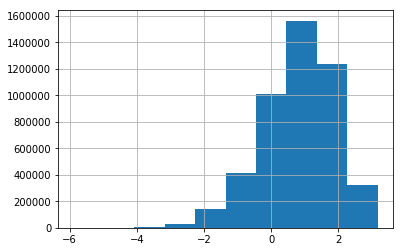

In [158]:
df2.duration_log.hist()

In [167]:
for col in df2.columns:
    print(col, ": \n", df2[col].nunique())

unique_key : 
 4718785
created_date : 
 4660119
closed_date : 
 3799870
agency : 
 1
agency_name : 
 3
complaint_type : 
 30
descriptor : 
 52
location_type : 
 25
incident_zip : 
 239
incident_address : 
 688856
street_name : 
 10928
cross_street_1 : 
 9947
cross_street_2 : 
 10103
address_type : 
 3
city : 
 48
facility_type : 
 1
status : 
 2
due_date : 
 4080809
resolution_description : 
 22
resolution_action_updated_date : 
 3903805
community_board : 
 72
bbl : 
 478855
borough : 
 6
x_coordinate_(state_plane) : 
 117107
y_coordinate_(state_plane) : 
 128644
open_data_channel_type : 
 5
park_facility_name : 
 269
park_borough : 
 6
latitude : 
 707203
longitude : 
 707209
location : 
 707216
complaint_duration : 
 83977
duration_log : 
 83977
